In [1]:
import sys, os
sys.path.append(os.path.abspath('../src'))

from data_processor import DataProcessor

############ 1 Data Processing ############

# Define file path 
file_path = '../data/raw/data_factory_1.xlsx'  
dp = DataProcessor(file_path)
dp.change_pivot('timestamp', 'param_name', 'value')
dp.list_columns()


['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'Permeate Pressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'Permeate Pressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [2]:
dp.rename_column_to_permeatepressure('Permeate Pressure')
dp.rename_column_to_timestamp('timestamp')
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [3]:
dp.export_to_csv('../data/processed/all2.csv')

In [4]:
# drop missing values
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])


In [5]:
# separate outputs from inputs
dp.drop_outputs(['DifferentialPressure','PermeateFlow', 'PermeatePressure', 'PermeateConductivity', 'ConcentrateFlow', 'ConcentratePressure','Recovery'])
dp.list_columns()

['timestamp', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature']


['timestamp',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature']

In [6]:
dp.head()

param_name           timestamp  FeedConductivity    FeedFlow  FeedPressure  \
0          2022-11-01 00:00:00        238.884183  387.863646    273.325000   
1          2022-11-01 01:00:00        239.050850  388.577708    273.159583   
2          2022-11-01 02:00:00        239.117517  386.958541    272.952917   
3          2022-11-01 03:00:00        239.234183  388.434167    271.841667   
4          2022-11-01 04:00:00        239.217517  387.695000    273.296667   

param_name  FeedTemperature  
0                 83.620000  
1                 83.740000  
2                 83.768333  
3                 84.445000  
4                 84.073333  


In [7]:
# export inputs and outputs to csv
dp.export_to_csv('../data/processed/data_factory_1_outputs_dropped.csv')
dp.outputs_df.to_csv('../data/processed/outputs_factory_1.csv', index=False)

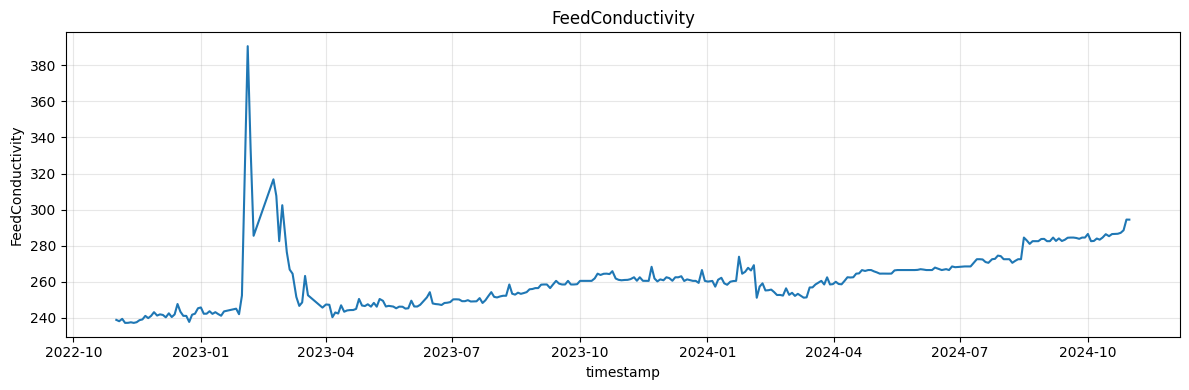

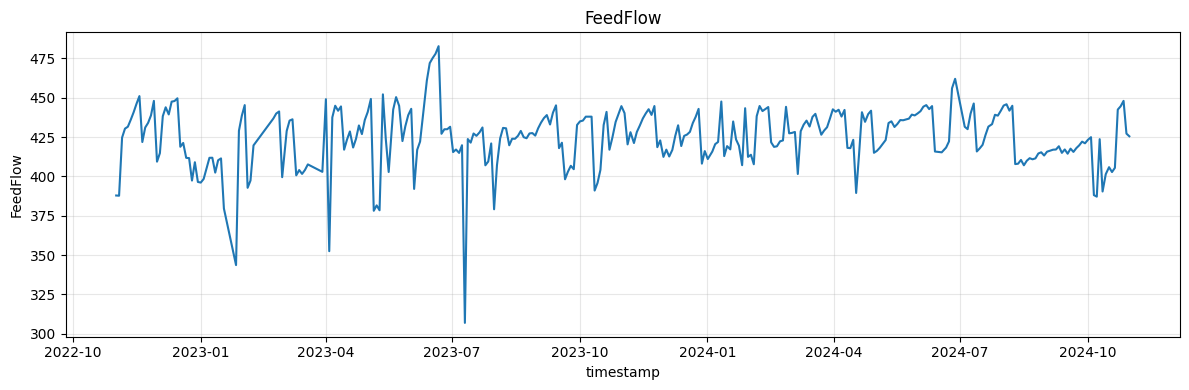

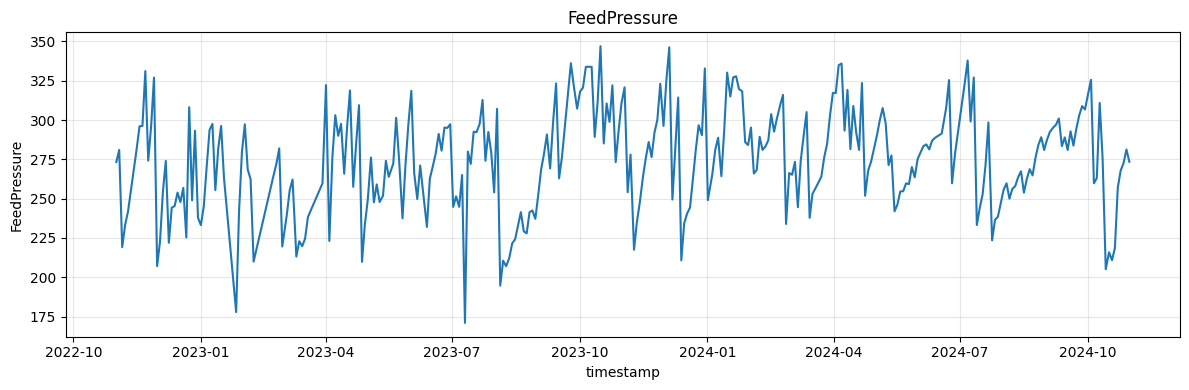

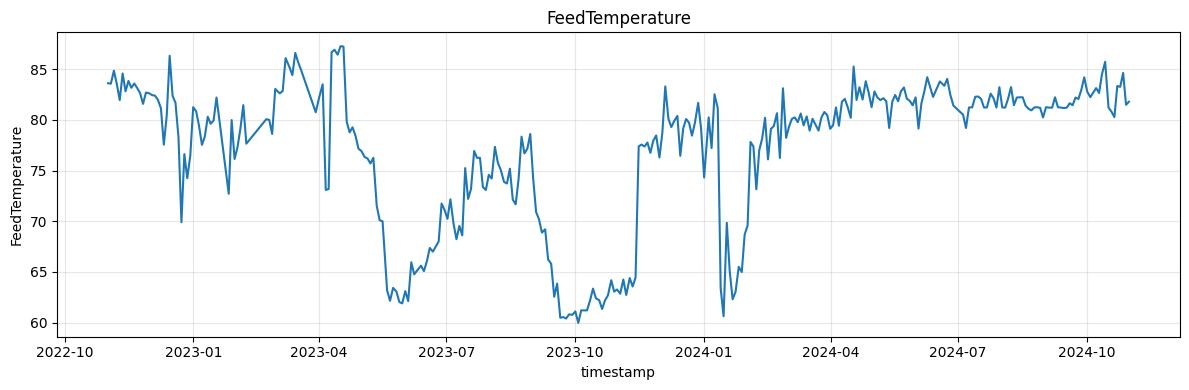

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/processed/data_factory_1_outputs_dropped.csv')

k = 50                # take one point every 50 rows
df_plot = df.iloc[::k].copy()

# N = 2000              # or 500, 1000, etc.
# df_plot = df.iloc[:N]

# for col in df_plot.columns:
#     if col == 'timestamp':   # skip timestamp as a y-value
#         continue
    
#     plt.figure(figsize=(12, 4))
#     plt.plot(df_plot.index, df_plot[col])
#     plt.title(col)
#     plt.xlabel('Index')
#     plt.ylabel(col)
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()


# visualize inputs over timestamp
# make sure timestamp is datetime
if 'timestamp' in df_plot.columns:
    df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])

    for col in df_plot.columns:
        if col in ['timestamp']:  # skip timestamp as a y-value
            continue
        
        plt.figure(figsize=(12, 4))
        plt.plot(df_plot['timestamp'], df_plot[col])
        plt.title(col)
        plt.xlabel('timestamp')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()



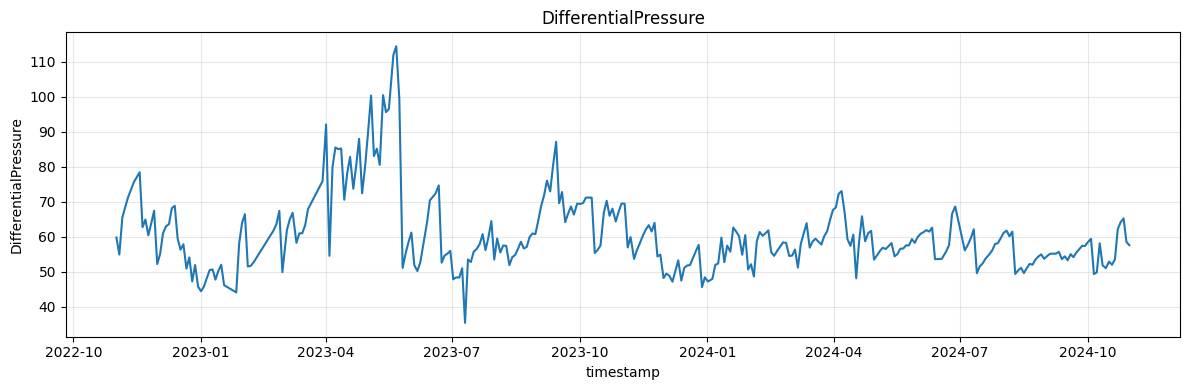

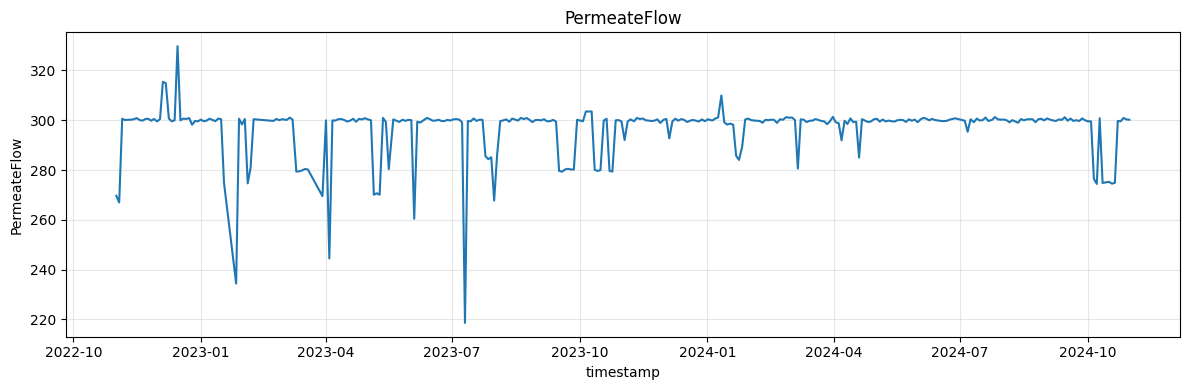

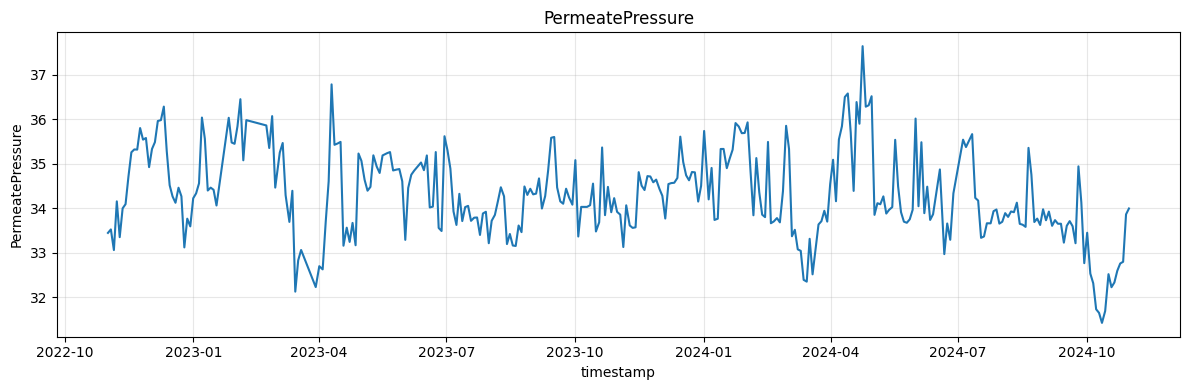

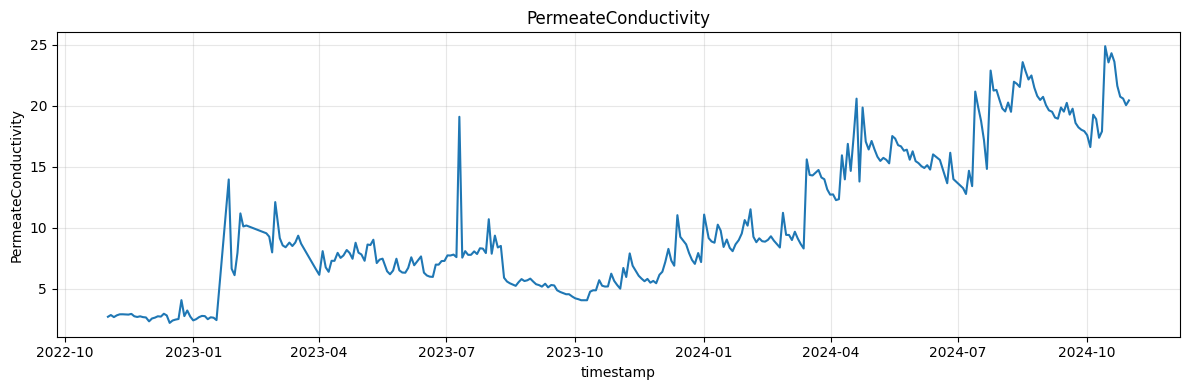

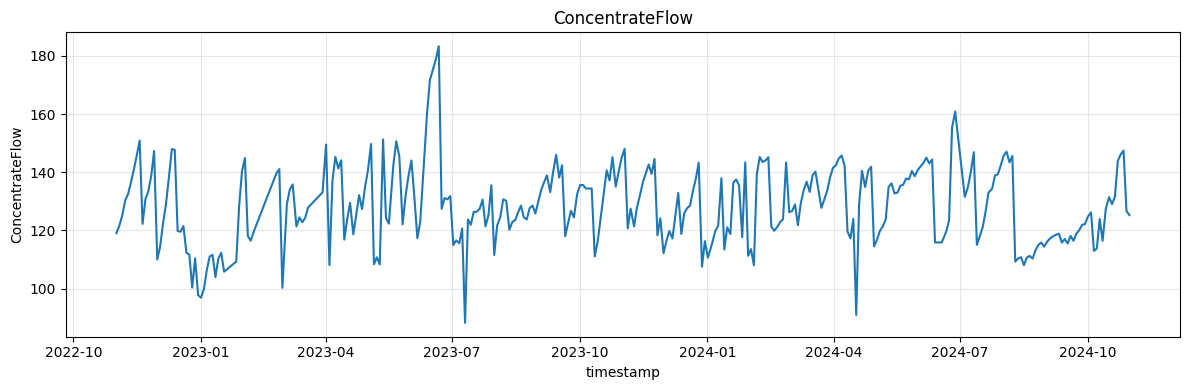

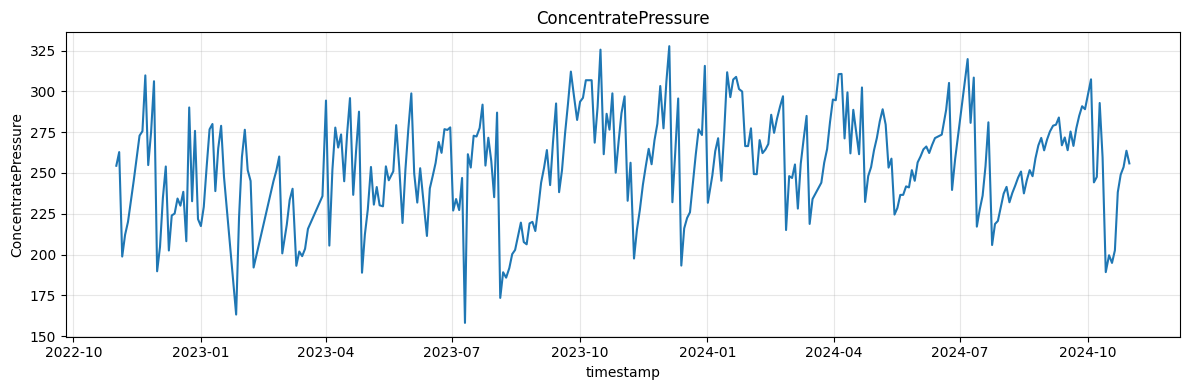

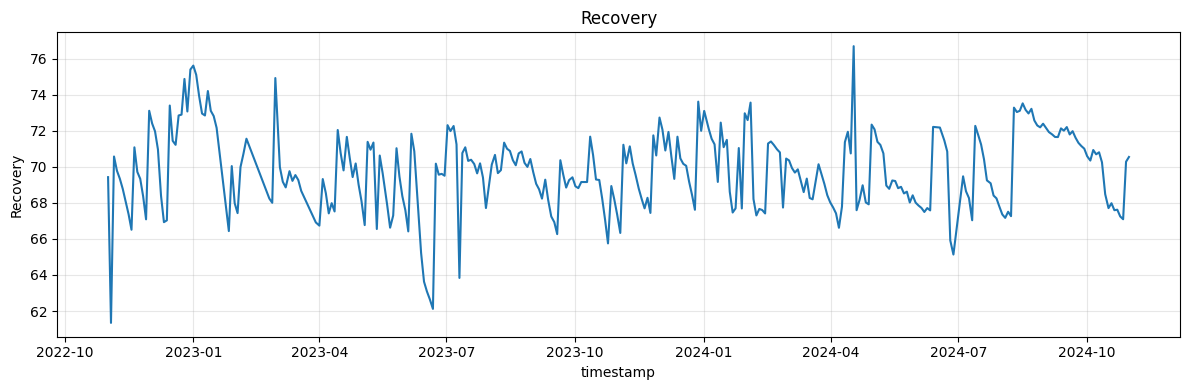

In [9]:
df_outputs = pd.read_csv('../data/processed/outputs_factory_1.csv')
df_outputs_plot = df_outputs.iloc[::k].copy()

# visualize outputs over timestamp
if 'timestamp' in df_plot.columns:
    df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])
    for col in df_outputs_plot.columns:
        if col in ['timestamp']:  # skip timestamp as a y-value
            continue
        
        plt.figure(figsize=(12, 4))
        plt.plot(df_plot['timestamp'], df_outputs_plot[col])
        plt.title(col)
        plt.xlabel('timestamp')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

In [10]:
########## 2 Cycle Processing ############
from data_processor import CycleProcessor
cp = CycleProcessor(signal_col='FeedFlow', df=dp.df, threshold=10)
cp.identify_cycles
cp.assign_cycle_features()

param_name,timestamp,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,cycle_id,cycle_time
0,2022-11-03 06:00:00,238.817517,420.034116,201.296667,82.621667,1,1
1,2022-11-03 07:00:00,238.381998,422.453790,208.745492,82.259016,1,2
2,2022-11-03 08:00:00,238.534183,419.866667,205.063333,83.078333,1,3
3,2022-11-03 09:00:00,238.567517,420.833333,206.750417,82.926667,1,4
4,2022-11-03 10:00:00,238.562325,421.344262,208.041803,82.410000,1,5
...,...,...,...,...,...,...,...
12496,2024-10-20 23:00:00,286.535033,406.166667,217.471667,81.189583,93,69
12497,2024-10-21 00:00:00,286.535033,405.333333,219.390000,80.668333,93,70
12498,2024-10-21 01:00:00,286.501700,406.200000,219.312500,81.167917,93,71
12499,2024-10-21 02:00:00,286.635033,404.533333,217.429167,81.522917,93,72


In [11]:
cp.export_files('../data/processed/cycle1.csv')
dp.df = cp.df

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/processed/cycle1.csv')
print("Available cycle_ids:", df['cycle_id'].unique())

Available cycle_ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]


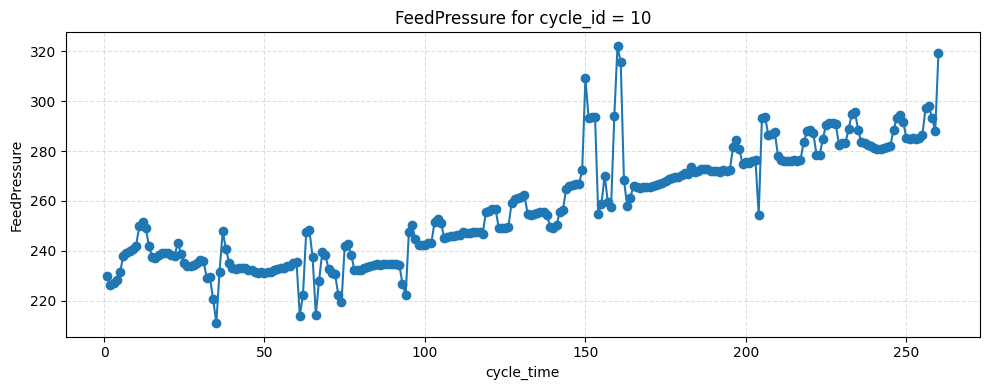

In [13]:
# df = CycleProcessor(signal_col='FeedFlow', df=cp, threshold=10)
CycleProcessor.plot_cycle(df, 10, signal_col='FeedPressure')

In [14]:
from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
interactive_cycle_plot(cp.df, plot_by_cycle)

Output()

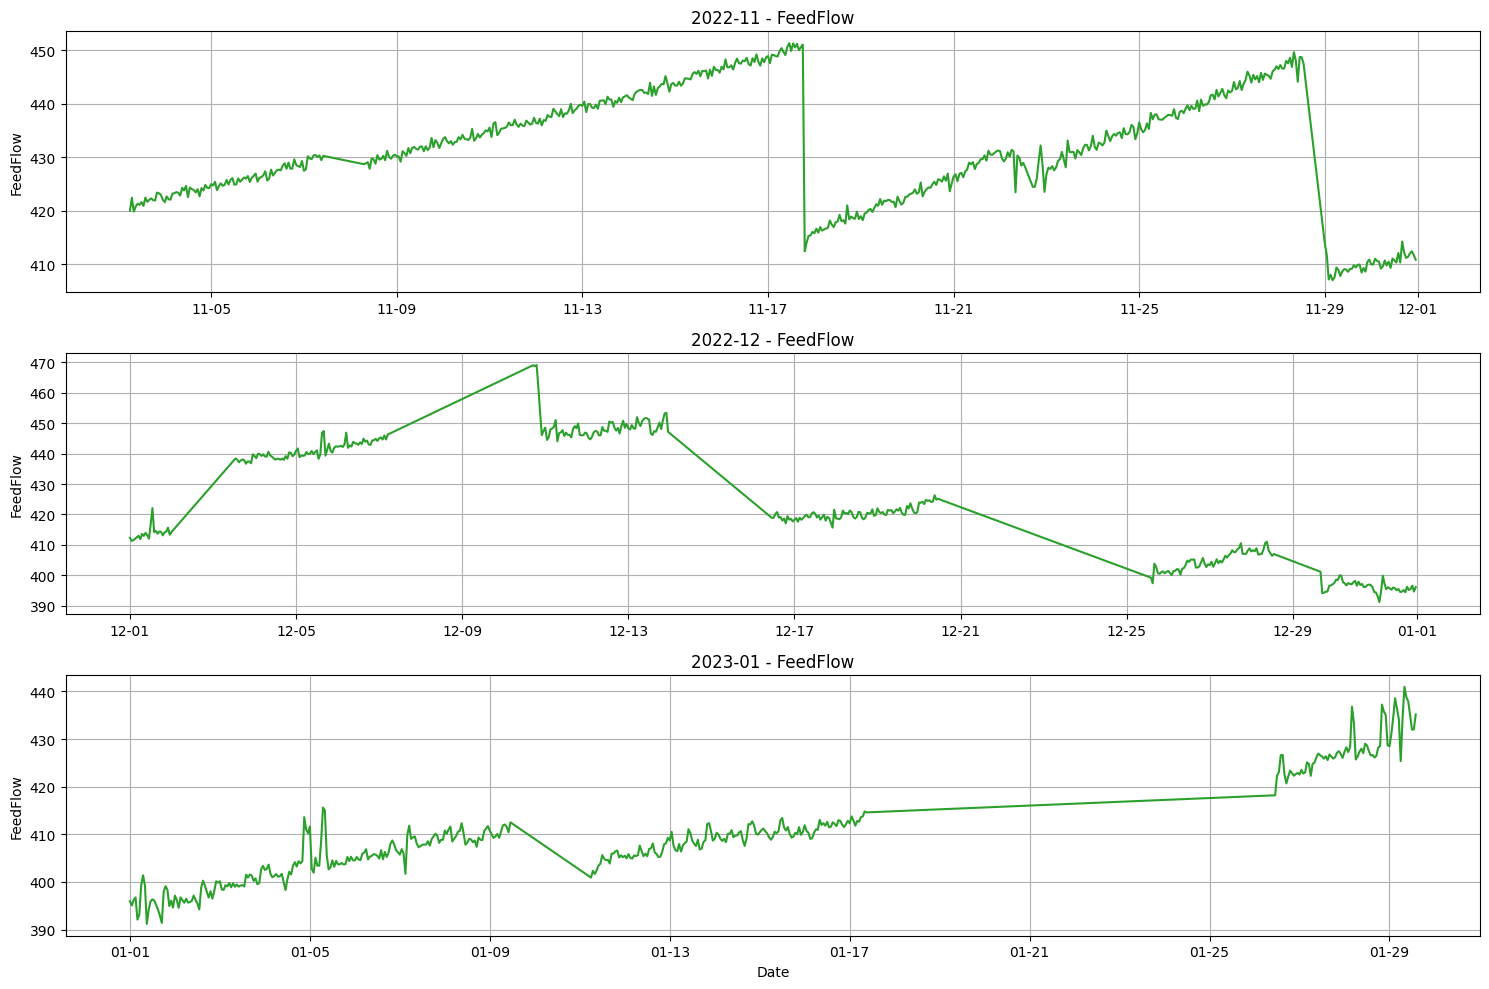

In [15]:
from utils.plot.plot_by_time_period import PlotByTimePeriod

pbt = PlotByTimePeriod(cp.df)
month = ['2022-11', '2022-12','2023-01']
pbt.plot_by_month(month,'FeedFlow')

In [16]:
######## 3 Feature Engineering ##########

from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)
# generate cross features excluding cycle_id and cycle_time
fe.generate_cross_features(drop_features=['cycle_id','cycle_time'])
# generate lag features
fe.lag_engineer()
# export to csv           
dp.df = fe.df
dp.export_to_csv('../data/processed/feature_1.csv')

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# list of existing features
fs = dp.df.columns.tolist()
print(fs)
print(f'Total columns (including timestamp): {len(fs)}')

In [ ]:
######## 4 Feature Selection ##########

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from data_processor import DataProcessor

# 1. Data Preprocessing
# Remove cycle metadata (cycle_id, cycle_time) and timestamp since these should not be inputs for RF
features = [f for f in fs if f not in ['cycle_id', 'cycle_time', 'timestamp']]
# Select first 10000 rows for feature selection
selected_inputs_data = dp.df[0:10000]
selected_outputs_data = dp.outputs_df[0:10000]
X_train, X_test, y_train, y_test = train_test_split(selected_inputs_data[features], selected_outputs_data['DifferentialPressure'], test_size=0.2, random_state=42)

In [ ]:
# size of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
 # 2. Train Random Forest
print("Training RandomForest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

In [ ]:
# Gets feature importances from RF, sorts features from most to least important. 
# Keeps 4 * top_num of them
top_num = 5
importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=X_train.columns)
top_features = feature_importance_series.sort_values(ascending=False).head(4*top_num).index.tolist()
top_features

In [ ]:
# Train again using top features
X_sub = X_train[top_features]
y_sub = y_train
print("Training simple RandomForest...")
rf_small = RandomForestRegressor(n_estimators=100, random_state=42)
rf_small.fit(X_sub, y_sub.values.ravel())
# Build SHAP explainer based on RF
explainer = shap.TreeExplainer(rf_small)
# SHAP refinement
X_sub_sample = X_sub.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sub_sample)


In [ ]:
 # 3. SHAP Analysis
shap_importance = pd.Series(np.abs(shap_values).mean(axis=0), index=X_sub.columns)
top_k_features = shap_importance.sort_values(ascending=False).head(top_num*2).index.tolist()

shap.summary_plot(shap_values, X_sub_sample, feature_names=X_sub.columns, max_display=top_num*2)

In [ ]:
# 4 Coarse Feature Selection 
from model.coarse_feature_selection.cfs import random_forest_regressor
target = ['DifferentialPressure']
top_k_features = random_forest_regressor(dp,'DifferentialPressure', fs, plant_name='factory_1')


In [ ]:
top_k_features

In [ ]:
######## 5 Prediction #########



X_all = dp.df[top_k_features]
y_all = dp.outputs_df['DifferentialPressure']

df_all = pd.concat([X_all, y_all], axis=1)
df_dropna = df_all.dropna().copy()
df_dropna.head(300)

In [ ]:
df_dropna.tail(300)

In [ ]:
df_dropna.to_csv('../data/processed/lstm_dropna.csv')

In [ ]:
df_dropna.columns.tolist()

In [ ]:
from model.lstm_model.enhanced_lstm import lstm_model
lstm_model(dp, top_k_features, target, feature_name='DifferentialPressure')